In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def barycentric_weights(nodes:np.ndarray):

    q = len(nodes)
    weights = np.ones(q, dtype=float)
    
    for i in range(q):

        denom = 1.0
        for j in range(q):
            if j != i:
                denom *= (nodes[i] - nodes[j])
        weights[i] = 1.0 / denom
        
    return weights

In [75]:
def barycentric_eval(x_eval:np.ndarray, nodes:np.ndarray, values:np.ndarray, weights:np.ndarray):
    
    interpolated_arr = np.zeros_like(x_eval, dtype=float)

    for i, x in enumerate(x_eval):
        # Check if x coincides with any node
        diff = x - nodes
        idx_zero = np.where(np.isclose(diff, 0.0))[0]
        if idx_zero.size > 0:
            interpolated_arr[i] = values[idx_zero][0]
        else:
            numer = np.sum((weights * values) / diff)
            denom = np.sum(weights / diff)
            interpolated_arr[i] = numer / denom
    
    return interpolated_arr

In [76]:
def f(x):
    return np.tanh(5*x)

In [77]:
eq_nodes = np.linspace(-1.0, 1.0, 13)
chebyshev_nodes = np.array([np.cos((2*i + 1) * np.pi / (2 * (12 + 1))) for i in range(13)])

eq_val = f(eq_nodes)
eq_weights = barycentric_weights(eq_nodes)

chebyshev_val = f(chebyshev_nodes)
chebyshev_weights = barycentric_weights(chebyshev_nodes)

x_fine = np.linspace(-1, 1, 600)
y_fine = f(x_fine) 

# Interpolate using equidistant nodes
y_interp_eq = barycentric_eval(x_fine, eq_nodes, eq_val, eq_weights)
# Interpolate using Chebyshev nodes
y_interp_chebyshev = barycentric_eval(x_fine, chebyshev_nodes, chebyshev_val, chebyshev_weights)



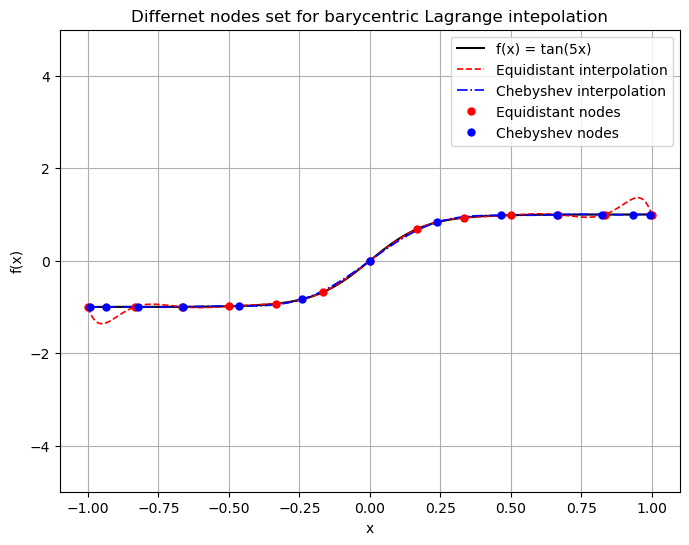

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(x_fine, y_fine, 'k-', label='f(x) = tan(5x)', linewidth=1.5)
plt.plot(x_fine, y_interp_eq, 'r--', label='Equidistant interpolation', linewidth=1.2)
plt.plot(x_fine, y_interp_chebyshev, 'b-.', label='Chebyshev interpolation', linewidth=1.2)

# Mark the node points for clarity
plt.plot(eq_nodes, eq_val, 'ro', label='Equidistant nodes', markersize=5)
plt.plot(chebyshev_nodes, chebyshev_val, 'bo', label='Chebyshev nodes', markersize=5)

plt.title("Differnet nodes set for barycentric Lagrange intepolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim([-5, 5])  # Adjust as needed; tan(5x) can blow up near x ~ ±pi/10
plt.legend()
plt.grid(True)
plt.show()


We observe that equidistant nodes have some significant inaccuracies on the boundary of domain. In genearl, node should be more dense near the boundary of interval. 